<a href="https://colab.research.google.com/github/Bright-Momo/SimplifiedJournalsGame/blob/main/3AuthorsSimulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install nashpy


In [33]:
import nashpy as nash
import numpy as np
import itertools

import matplotlib.pyplot as plt

In [4]:

# Parameters
alpha = 0.6    # Probability of a good paper
epsilon = 0.1  # Probability of misclassifying a good paper as bad
lam = 0.1       # Probability of misclassifying a bad paper as good
r = 1.0         # Reward for author when accepted
c = 0.5         # Cost for author when rejected



In [ ]:
# Journal payoff as average quality (as an example)
def Q(alpha, epsilon, lam):
    numerator = alpha * (1 - epsilon)
    denominator = alpha * (1 - epsilon) + (1 - alpha) * lam
    return numerator / denominator

In [17]:
# acceptance_probability function
def acceptance_probability(is_good_paper, journal_strategy, epsilon, lam):
    if journal_strategy == 0:  # Always Accept
        return 1.0
    elif journal_strategy == 1:  # Only Accept Good
        return 1 - epsilon if is_good_paper else lam
    elif journal_strategy == 2:  # Only Accept Bad
        return epsilon if is_good_paper else 1 - lam
    else:  # Reject All
        return 0.0

update for functions

In [25]:
# Single author vs journal payoff calculation
def author_journal_payoff(author_strategy, journal_strategy, alpha, epsilon, lam, r, c):
    if author_strategy == 0:  # Always Submit
        good_prob, bad_prob = alpha, 1 - alpha
    elif author_strategy == 1:  # Only Submit Good
        good_prob, bad_prob = alpha, 0
    elif author_strategy == 2:  # Only Submit Bad
        good_prob, bad_prob = 0, 1 - alpha
    else:  # No Submit
        good_prob, bad_prob = 0, 0

    p_accept_good = acceptance_probability(True, journal_strategy, epsilon, lam)
    p_accept_bad = acceptance_probability(False, journal_strategy, epsilon, lam)

    accept_rate = good_prob * p_accept_good + bad_prob * p_accept_bad
    submit_rate = good_prob + bad_prob
    reject_rate = submit_rate - accept_rate

    author_payoff = accept_rate * r - reject_rate * c
    journal_payoff = (good_prob * p_accept_good) / accept_rate if accept_rate > 0 else 0

    return author_payoff, journal_payoff

In [19]:
# Enumerate all possible strategies
strategies = [0, 1, 2, 3]

# Evaluate and list all possible strategy combinations with their payoffs
all_strategy_payoffs = {}

In [29]:
for journal_strategy in strategies:
    for authors_strategies in itertools.product(strategies, repeat=3):
        author_payoffs = []
        journal_qualities = []

        for author_strategy in authors_strategies:
            payoff, quality = author_journal_payoff(author_strategy, journal_strategy, alpha, epsilon, lam, r, c)
            author_payoffs.append(payoff)
            journal_qualities.append(quality)

        avg_quality = np.mean(journal_qualities)
        all_strategy_payoffs[(authors_strategies, journal_strategy)] = (author_payoffs, avg_quality)
        print(f"Strategy: {authors_strategies, journal_strategy} | Author Payoffs: {author_payoffs} | Journal Avg Quality: {avg_quality:.2f}")


Strategy: ((0, 0, 0), 0) | Author Payoffs: [1.0, 1.0, 1.0] | Journal Avg Quality: 0.60
Strategy: ((0, 0, 1), 0) | Author Payoffs: [1.0, 1.0, 0.6] | Journal Avg Quality: 0.73
Strategy: ((0, 0, 2), 0) | Author Payoffs: [1.0, 1.0, 0.4] | Journal Avg Quality: 0.40
Strategy: ((0, 0, 3), 0) | Author Payoffs: [1.0, 1.0, 0.0] | Journal Avg Quality: 0.40
Strategy: ((0, 1, 0), 0) | Author Payoffs: [1.0, 0.6, 1.0] | Journal Avg Quality: 0.73
Strategy: ((0, 1, 1), 0) | Author Payoffs: [1.0, 0.6, 0.6] | Journal Avg Quality: 0.87
Strategy: ((0, 1, 2), 0) | Author Payoffs: [1.0, 0.6, 0.4] | Journal Avg Quality: 0.53
Strategy: ((0, 1, 3), 0) | Author Payoffs: [1.0, 0.6, 0.0] | Journal Avg Quality: 0.53
Strategy: ((0, 2, 0), 0) | Author Payoffs: [1.0, 0.4, 1.0] | Journal Avg Quality: 0.40
Strategy: ((0, 2, 1), 0) | Author Payoffs: [1.0, 0.4, 0.6] | Journal Avg Quality: 0.53
Strategy: ((0, 2, 2), 0) | Author Payoffs: [1.0, 0.4, 0.4] | Journal Avg Quality: 0.20
Strategy: ((0, 2, 3), 0) | Author Payoffs: 

In [30]:
# Find Nash equilibria and optimal journal strategy
journal_best_strategy = None
best_quality = -1
final_equilibria = {}

for journal_strategy in strategies:
    payoff_matrix = np.array([[author_journal_payoff(a_strategy, journal_strategy, alpha, epsilon, lam, r, c)[0] for a_strategy in strategies] for _ in range(3)])
    game = nash.Game(payoff_matrix)
    equilibria = list(game.support_enumeration())
    final_equilibria[journal_strategy] = equilibria

    avg_quality = np.mean([author_journal_payoff(a, journal_strategy, alpha, epsilon, lam, r, c)[1] for a in strategies])
    if avg_quality > best_quality:
        best_quality = avg_quality
        journal_best_strategy = journal_strategy


In [31]:
# Get optimal strategy explicitly
optimal_authors_strategies = max(itertools.product(strategies, repeat=3), key=lambda strat: np.mean([author_journal_payoff(a, journal_best_strategy, alpha, epsilon, lam, r, c)[0] for a in strat]))
optimal_strategy_matrix = list(optimal_authors_strategies) + [journal_best_strategy]

# Explicit payoffs for optimal strategy
optimal_author_payoffs = [author_journal_payoff(a, journal_best_strategy, alpha, epsilon, lam, r, c)[0] for a in optimal_authors_strategies]
optimal_journal_quality = np.mean([author_journal_payoff(a, journal_best_strategy, alpha, epsilon, lam, r, c)[1] for a in optimal_authors_strategies])

# Output results
print(f"Optimal Strategy Matrix [author1, author2, author3, journal]: {optimal_strategy_matrix}")
print(f"Optimal Author Payoffs: {optimal_author_payoffs}")
print(f"Optimal Journal Strategy: {journal_best_strategy} with average quality: {optimal_journal_quality:.2f}")
print(f"Final Nash Equilibria: {final_equilibria[journal_best_strategy]}")


Optimal Strategy Matrix [author1, author2, author3, journal]: [1, 1, 1, 1]
Optimal Author Payoffs: [0.51, 0.51, 0.51]
Optimal Journal Strategy: 1 with average quality: 1.00
Final Nash Equilibria: [(array([1., 0., 0.]), array([0., 0., 1., 0.])), (array([0., 1., 0.]), array([0., 0., 1., 0.])), (array([0., 0., 1.]), array([0., 0., 1., 0.]))]


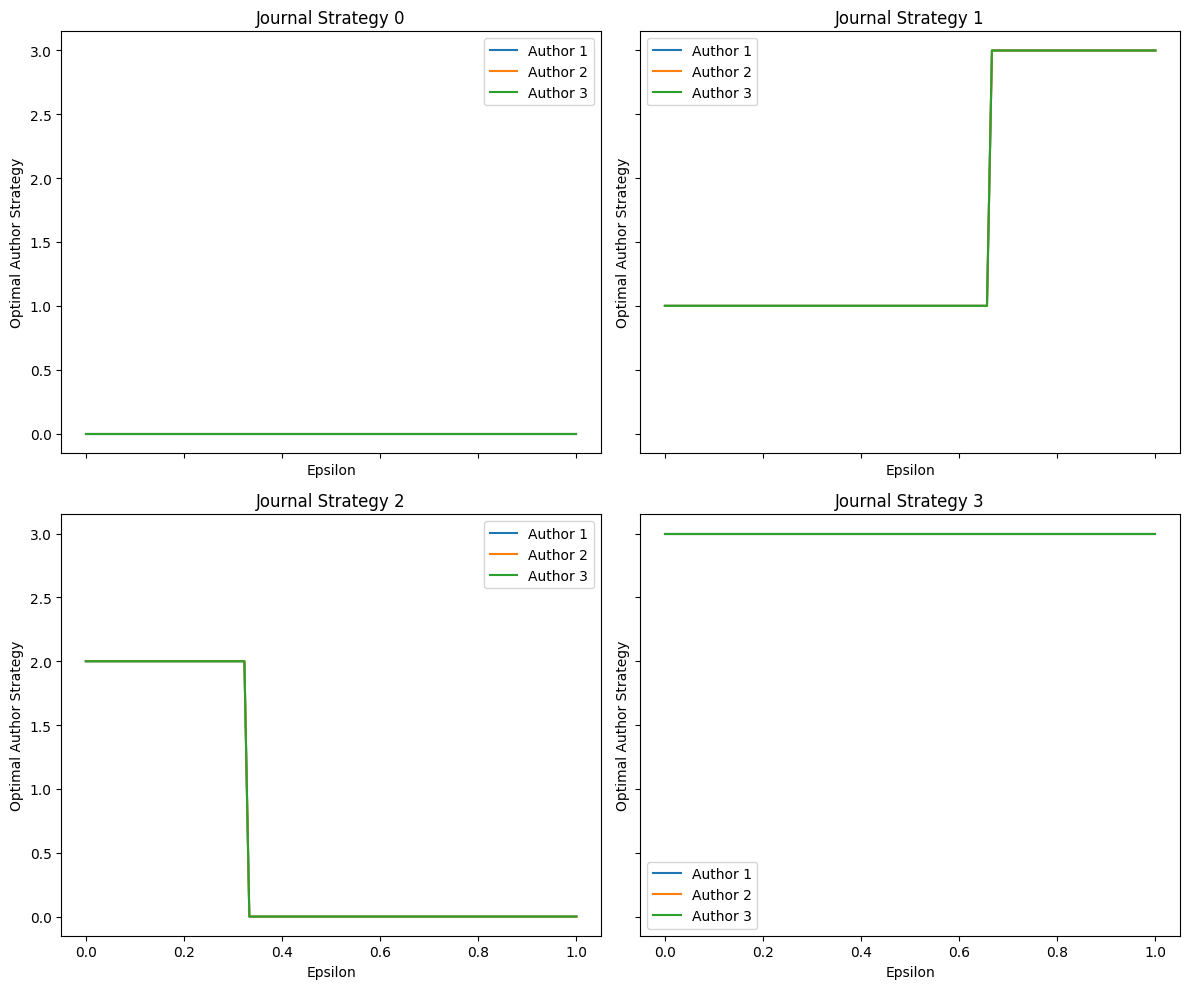

In [34]:
# Plotting impact of epsilon on author strategies for each journal strategy
fig, axes = plt.subplots(2, 2, figsize=(12, 10), sharex=True, sharey=True)
epsilon_values = np.linspace(0, 1, 100)

for journal_strategy in strategies:
    ax = axes.flatten()[journal_strategy]
    for author_idx in range(3):
        author_choices = []
        for eps in epsilon_values:
            payoffs = [author_journal_payoff(a, journal_strategy, alpha, eps, lam, r, c)[0] for a in strategies]
            best_strategy = np.argmax(payoffs)
            author_choices.append(best_strategy)

        ax.plot(epsilon_values, author_choices, label=f"Author {author_idx+1}")

    ax.set_title(f'Journal Strategy {journal_strategy}')
    ax.set_xlabel('Epsilon')
    ax.set_ylabel('Optimal Author Strategy')
    ax.legend()

plt.tight_layout()
plt.show()
